## 사용 패키지

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## 데이터 로드

In [46]:
train = pd.read_csv('C:/Users/juyeo/Desktop/구내식당/train.csv')
test = pd.read_csv('C:/Users/juyeo/Desktop/구내식당/test.csv')
submission = pd.read_csv('C:/Users/juyeo/Desktop/구내식당//sample_submission.csv')

## 데이터

In [47]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [48]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [49]:
submission.head()

,일자,중식계,석식계
0,2021-01-27,1026.570,405.03
1,2021-01-28,972.200,397.48
2,2021-01-29,594.700,268.94
3,2021-02-01,1203.765,485.52
4,2021-02-02,958.410,461.19


## 요일을 숫자로 매핑

In [50]:
train['요일'] = train['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})
test['요일'] = test['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})

## 수치 데이터만 피쳐로 선택

In [51]:
x_train = train[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]
y1_train = train['중식계']
y2_train = train['석식계']

x_test = test[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]

## 점심과 저녁을 식수 인원을 예측할 2개 모델 생성

In [65]:
#model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
#model2 = RandomForestRegressor(n_jobs=-1, random_state=42)

In [66]:
#model1.fit(x_train, y1_train)
#model2.fit(x_train, y2_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

## 랜덤 포레스트 (점심)

In [52]:
x1_train, x1_test, x2_train, x2_test = train_test_split(x_train, y1_train, test_size=0.2, random_state=1)
model1 = RandomForestRegressor(n_jobs=-1, random_state=42, criterion='mae')
model1.fit(x1_train, x2_train)
x2_train_pred = model1.predict(x1_train)
x2_test_pred = model1.predict(x1_test)

## 성능 평가 (R-squared 상관계수)
print('훈련 MAE: %.3f, 테스트 MAE: %.3f' %(mean_squared_error(x2_train, x2_train_pred), mean_squared_error(x2_test, x2_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' %(r2_score(x2_train, x2_train_pred), r2_score(x2_test, x2_test_pred)))

훈련 MAE: 1863.564, 테스트 MAE: 12060.291
훈련 R^2: 0.958, 테스트 R^2: 0.725


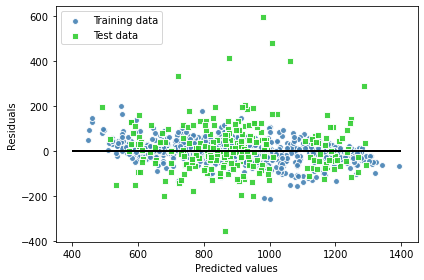

In [53]:
## 잔차그래프
plt.scatter(x2_train_pred, x2_train_pred - x2_train, c='steelblue', edgecolor='white', marker='o', s=35, alpha=0.9, label='Training data')
plt.scatter(x2_test_pred, x2_test_pred - x2_test, c='limegreen', edgecolor='white', marker='s', s=35, alpha=0.9, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=400, xmax=1400, lw=2, color='black')
plt.tight_layout()
plt.show()

## 랜덤포레스트 (저녁)

In [54]:
## 훈련데이터 분리
x1_train, x1_test, x2_train, x2_test = train_test_split(x_train, y2_train, test_size=0.2, random_state=1)

## 랜덤포레스트 (베이스라인)
model2 = RandomForestRegressor(n_jobs=-1, random_state=42, criterion='mae')
model2.fit(x1_train, x2_train)
x2_train_pred = model2.predict(x1_train)
x2_test_pred = model2.predict(x1_test)

## 성능 평가 (R-squared 상관계수)
print('훈련 MAE: %.3f, 테스트 MAE: %.3f' %(mean_squared_error(x2_train, x2_train_pred), mean_squared_error(x2_test, x2_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' %(r2_score(x2_train, x2_train_pred), r2_score(x2_test, x2_test_pred)))

훈련 MAE: 1743.559, 테스트 MAE: 9758.808
훈련 R^2: 0.909, 테스트 R^2: 0.517


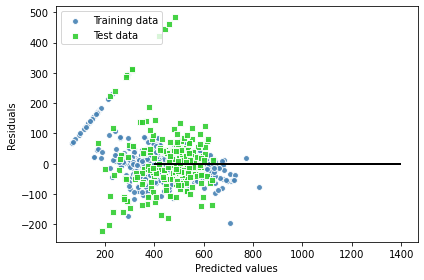

In [55]:
## 잔차그래프
plt.scatter(x2_train_pred, x2_train_pred - x2_train, c='steelblue', edgecolor='white', marker='o', s=35, alpha=0.9, label='Training data')
plt.scatter(x2_test_pred, x2_test_pred - x2_test, c='limegreen', edgecolor='white', marker='s', s=35, alpha=0.9, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=400, xmax=1400, lw=2, color='black')
plt.tight_layout()
plt.show()

## 추론

In [12]:
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)

## 결과 제출

In [13]:
submission['중식계'] = pred1
submission['석식계'] = pred2

In [14]:
submission.to_csv('sample_submission.csv', index=False)

In [15]:
submission = pd.read_csv('C:/Users/juyeo/Desktop/구내식당//sample_submission.csv')

In [16]:
submission

,일자,중식계,석식계
0,2021-01-27,1026.570,405.030
1,2021-01-28,972.200,397.480
2,2021-01-29,594.700,268.940
3,2021-02-01,1203.765,485.520
4,2021-02-02,958.410,461.190
5,2021-02-03,1002.170,402.930
6,2021-02-04,924.090,477.400
7,2021-02-05,596.850,341.310
8,2021-02-08,1170.835,646.470
9,2021-02-09,989.570,511.270
